<a href="https://colab.research.google.com/github/yuja1130/AIpython./blob/main/20240607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())

In [22]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())
test_data["Embarked"] = test_data["Embarked"].fillna(test_data["Embarked"].mode()[0])

In [25]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [26]:
train_data = pd.get_dummies(train_data, columns = ["Sex", "Embarked"])
test_dadta = pd.get_dummies(test_data, columns = ["Sex", "Embarked"])

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [30]:
train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [32]:
test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

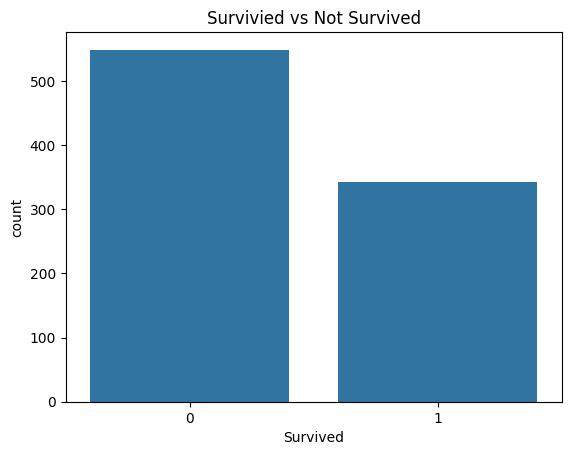

In [35]:
sns.countplot(x = "Survived", data = train_data)
plt.title("Survivied vs Not Survived")
plt.show()

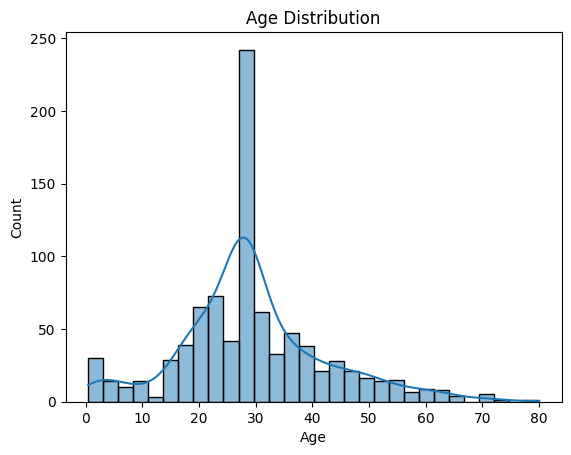

In [37]:
sns.histplot(train_data["Age"], bins=30, kde = True)
plt.title("Age Distribution")
plt.show()

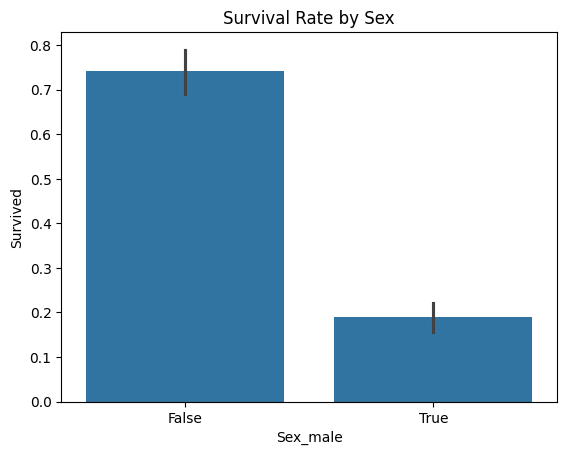

In [38]:
sns.barplot(x="Sex_male", y="Survived", data = train_data)
plt.title("Survival Rate by Sex")
plt.show()

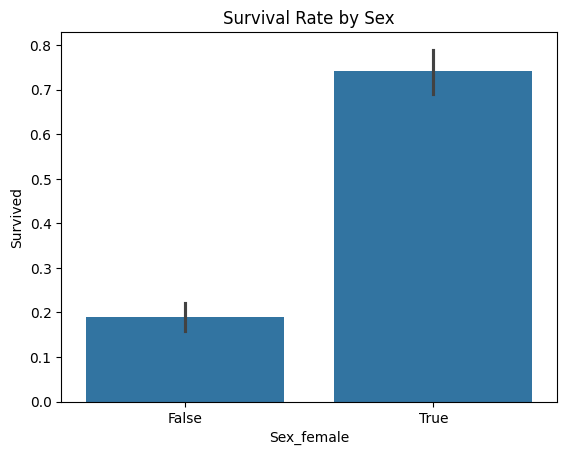

In [39]:
sns.barplot(x="Sex_female", y="Survived", data= train_data)
plt.title("Survival Rate by Sex")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [44]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.2, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.776536312849162


In [54]:
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[83 22]
 [18 56]]


In [58]:
class_report = classification_report(y_val, y_pred)
print("Classification Report")
print(class_report)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [59]:
from sklearn.tree import plot_tree

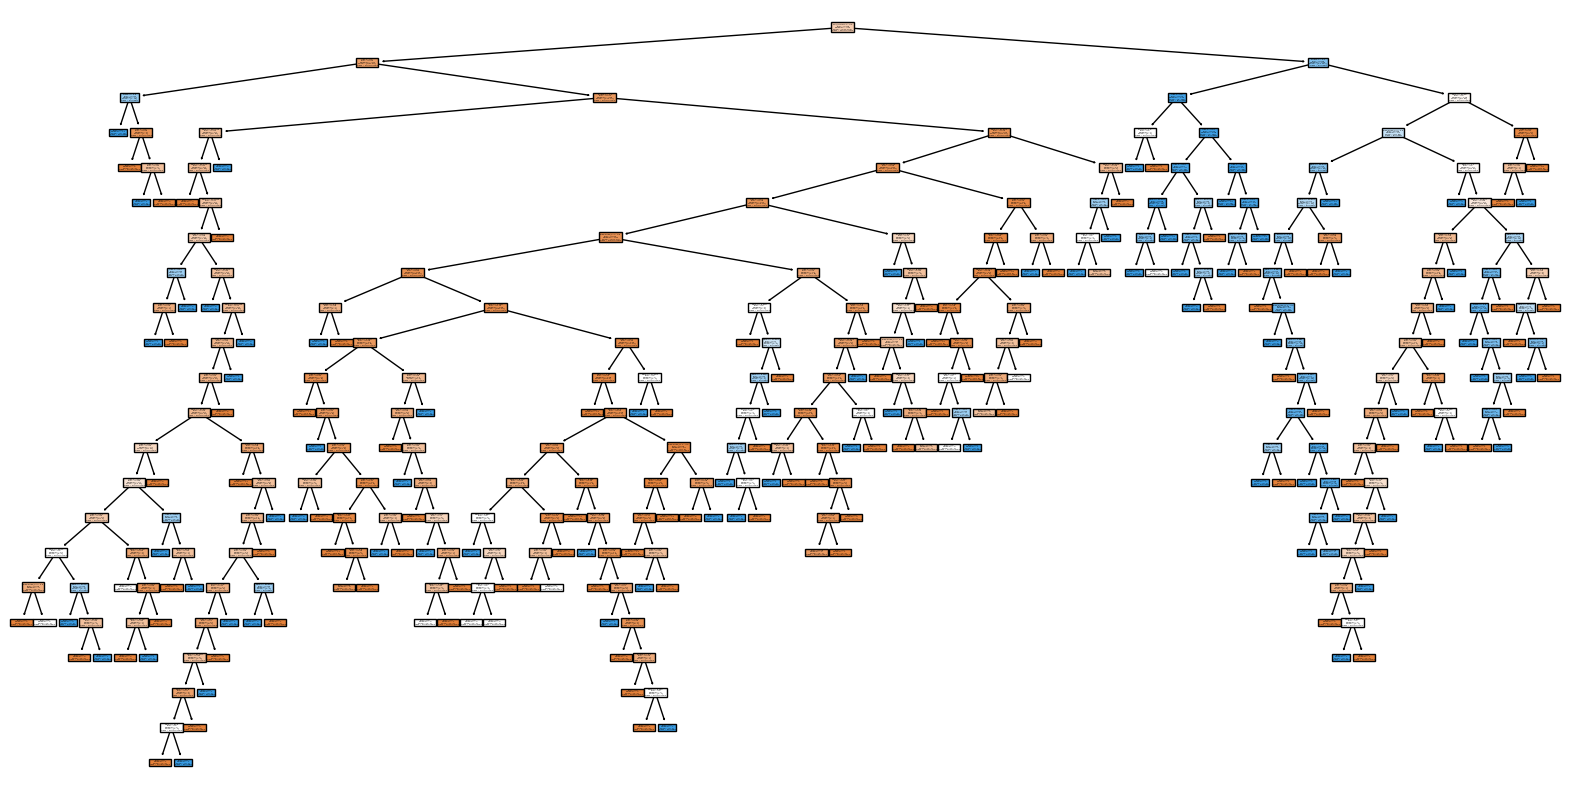

In [63]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()